In [1]:
# Packages
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
# Print more rows and columns of pandas.DataFrame
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [3]:
# Change path if needed
path = r'C:\Users\user\Desktop\KUL - Mstat\Big Data Platforms and Technologies\project'
data = pd.read_csv(path + r'\train.csv', delimiter = ';')

**<font color='green'>Remark: The dataset contains 55,463 instances and 78 features.</font>**

In [4]:
# dimension of data set
data.shape

(55463, 78)

### **<font color='blue'>Featurization</font>**


**No imputation or outlier detection should be made in this notebook.**

**<font color='green'>Remark: We found missing values in 55 out of 78 features. The distribution of missing values are summarized in the following barplot.</font>**

In [5]:
# Missing value in percentage
missing = pd.DataFrame(data.isna().sum()).T
missing /= data.shape[0]
missing

,claim_id,fraud,claim_amount,claim_date_registered,claim_date_occured,claim_time_occured,claim_postal_code,claim_cause,claim_liable,claim_num_injured,claim_num_third_parties,claim_num_vehicles,claim_police,claim_alcohol,claim_language,claim_vehicle_id,claim_vehicle_brand,claim_vehicle_type,claim_vehicle_date_inuse,claim_vehicle_cyl,claim_vehicle_load,claim_vehicle_fuel_type,claim_vehicle_power,policy_holder_id,policy_holder_postal_code,policy_holder_form,policy_holder_year_birth,policy_holder_country,policy_holder_expert_id,driver_id,driver_postal_code,driver_form,driver_year_birth,driver_country,driver_expert_id,driver_injured,driver_vehicle_id,third_party_1_id,third_party_1_postal_code,third_party_1_injured,third_party_1_vehicle_type,third_party_1_form,third_party_1_year_birth,third_party_1_country,third_party_1_vehicle_id,third_party_1_expert_id,third_party_2_id,third_party_2_postal_code,third_party_2_injured,third_party_2_vehicle_type,third_party_2_form,third_party_2_year_birth,third_party_2_country,third_party_2_vehicle_id,third_party_2_expert_id,third_party_3_id,third_party_3_postal_code,third_party_3_injured,third_party_3_vehicle_type,third_party_3_form,third_party_3_year_birth,third_party_3_country,third_party_3_vehicle_id,third_party_3_expert_id,repair_id,repair_postal_code,repair_form,repair_year_birth,repair_country,repair_sla,policy_date_start,policy_date_next_expiry,policy_date_last_renewed,policy_num_changes,policy_num_claims,policy_premium_100,policy_coverage_1000,policy_coverage_type
0,0.0,0.0,0.0,0.0,0.0,0.883652,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.983629,0.000775,0.186196,0.179146,0.002777,0.01107,0.088654,0.155365,0.007861,0.164939,0.0,0.002001,0.0,0.09702,0.0,0.827308,0.0,0.001316,0.0,0.222959,0.0,0.752159,0.0,0.185998,0.247751,0.267656,0.247751,0.289202,0.247751,0.822044,0.247751,0.340984,0.988208,0.923949,0.926239,0.923949,0.93758,0.923949,0.970773,0.923949,0.94829,0.999513,0.999495,0.999513,0.999495,0.999603,0.999495,0.999838,0.999495,0.999675,1.0,0.543029,0.543425,0.543029,0.998395,0.543029,0.0,0.164993,0.164993,0.164993,0.0,0.0,0.165191,0.512414,0.0


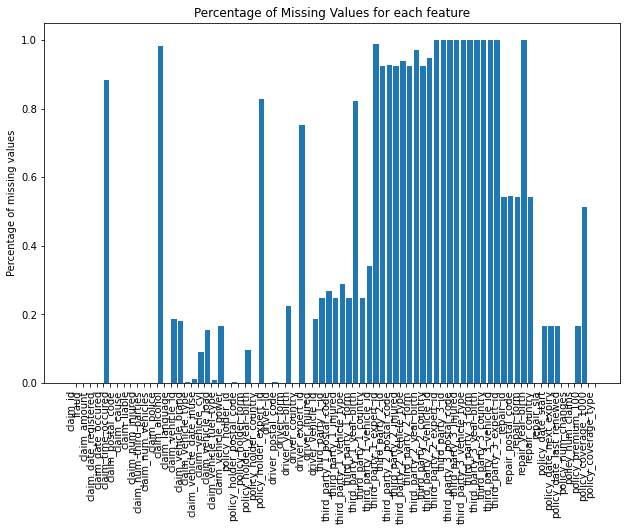

In [6]:
# Barplot for missing values
plt.rcParams['figure.figsize'] = [8, 5]
labels = missing.columns.tolist()
x = np.arange(len(labels))
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.bar(x, missing.values.tolist()[0])
plt.xticks(x + 0.5, labels)
ax.set_xticklabels(labels, rotation = 90, ha = 'right');
ax.set_ylabel('Percentage of missing values');
ax.set_title('Percentage of Missing Values for each feature');
plt.savefig('missing_value_plt1.png', bbox_inches='tight')

In [7]:
# How many features have missing values > 50%?
(missing > 0.5).sum(axis = 1)

0    30
dtype: int64

**<font color='blue'> Data before featurization (raw data) </font>**

In [8]:
# First few cases of data
data.head()

,claim_id,fraud,claim_amount,claim_date_registered,claim_date_occured,claim_time_occured,claim_postal_code,claim_cause,claim_liable,claim_num_injured,claim_num_third_parties,claim_num_vehicles,claim_police,claim_alcohol,claim_language,claim_vehicle_id,claim_vehicle_brand,claim_vehicle_type,claim_vehicle_date_inuse,claim_vehicle_cyl,claim_vehicle_load,claim_vehicle_fuel_type,claim_vehicle_power,policy_holder_id,policy_holder_postal_code,policy_holder_form,policy_holder_year_birth,policy_holder_country,policy_holder_expert_id,driver_id,driver_postal_code,driver_form,driver_year_birth,driver_country,driver_expert_id,driver_injured,driver_vehicle_id,third_party_1_id,third_party_1_postal_code,third_party_1_injured,third_party_1_vehicle_type,third_party_1_form,third_party_1_year_birth,third_party_1_country,third_party_1_vehicle_id,third_party_1_expert_id,third_party_2_id,third_party_2_postal_code,third_party_2_injured,third_party_2_vehicle_type,third_party_2_form,third_party_2_year_birth,third_party_2_country,third_party_2_vehicle_id,third_party_2_expert_id,third_party_3_id,third_party_3_postal_code,third_party_3_injured,third_party_3_vehicle_type,third_party_3_form,third_party_3_year_birth,third_party_3_country,third_party_3_vehicle_id,third_party_3_expert_id,repair_id,repair_postal_code,repair_form,repair_year_birth,repair_country,repair_sla,policy_date_start,policy_date_next_expiry,policy_date_last_renewed,policy_num_changes,policy_num_claims,policy_premium_100,policy_coverage_1000,policy_coverage_type
0,10000,N,"4895,00",20170101,20161229,NaN,2018,traffic accident,Y,1,1,2,Y,NaN,2.0,MDk5NTBkZjRmMDEwZDBjNWM4NmZjZGRkZjA5NjBlMjQ,NaN,car,200803.0,998.0,1.25,1.0,51.0,MDkzNDEwOTgwZjg4NTM5MzdjOWJiZTgzMGM1ZTMzZWY,2660.0,F,1981.0,B,NaN,MDkzNDEwOTgwZjg4NTM5MzdjOWJiZTgzMGM1ZTMzZWY,2660.0,F,1981.0,B,NaN,N,MDk5NTBkZjRmMDEwZDBjNWM4NmZjZGRkZjA5NjBlMjQ,OThlMjdmMTViYzQwNzc2Y2E0ZjNmZTYxMmZiODY5ZGE,9120.0,Y,car,F,1958.0,B,MjQ1ZjNjMzcwM2Q5N2E1ZWE4NjM4ZjNhYTlkZjIzMjM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,201604.0,201704.0,201704.0,1,0,4.0,NaN,#000111000
1,10001,N,"3249,81",20170101,20161223,NaN,8820,traffic accident,N,0,0,1,N,NaN,2.0,NaN,NaN,car,201402.0,NaN,NaN,1.0,NaN,ZTI3MGIyZTg2MjEzOTk3OThhMzc1NzdmMTQ3NzYxZTk,1730.0,M,1986.0,B,NaN,ZTI3MGIyZTg2MjEzOTk3OThhMzc1NzdmMTQ3NzYxZTk,1730.0,M,1986.0,B,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ZmE0MjZmOTg5MWY4ODIzNzFlMTQ5MjAyYzgyYTY5MWI,1861.0,C,NaN,B,Y,NaN,NaN,NaN,0,0,NaN,NaN,#000000000
2,10002,N,"3242,89",20170101,20161228,NaN,1831,traffic accident,Y,0,1,2,N,NaN,2.0,YWRjY2RjYmQzMWZiNmQ0ZTUzNWY0MzE1OTQzOWNlMjk,TOYOTA,van,200406.0,3000.0,3.30,1.0,175.0,NjllOGVkYjU4N2ZmZmNhZjk0NjA3NTNjODgxMDAzNmU,9200.0,M,1971.0,B,NaN,NjllOGVkYjU4N2ZmZmNhZjk0NjA3NTNjODgxMDAzNmU,9200.0,M,1971.0,B,NaN,N,YWRjY2RjYmQzMWZiNmQ0ZTUzNWY0MzE1OTQzOWNlMjk,NGQ1YzdjYTUyNzYwODFkMjZjNjZlZTcyMWYwMWI4Njg,8510.0,N,car,C,NaN,B,Y2Q4ZWRhY2Y2Y2ZhODg1ZDkxMTVkYWZiYjc3MWU0YWU,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,200704.0,201704.0,201704.0,0,0,20.0,58.0,#111110000
3,10003,N,"2687,00",20170101,20161228,NaN,2610,traffic accident,Y,0,1,3,N,NaN,2.0,ZjQ1MzlmNzc0NTBiOWIwZjMwMzliYzIwYTFjMmQ5N2I,PEUGEOT,car,200006.0,1868.0,1.59,2.0,51.0,ODA1ODBiZGExOWI2MDU5ODJhNDRmNTBhMmU2ZDAxMDM,2610.0,M,1945.0,B,NaN,ODA1ODBiZGExOWI2MDU5ODJhNDRmNTBhMmU2ZDAxMDM,2610.0,M,1945.0,B,NaN,N,ZjQ1MzlmNzc0NTBiOWIwZjMwMzliYzIwYTFjMmQ5N2I,Mzk4YmMzMWRiY2Y0OGNhMzQxOWM3ZDFhYjllZDFiOTI,2845.0,N,car,C,NaN,B,ZTI5NDNiZDFhYmQwYzdjOWUzYjU3MDVhMTdmMDIyNzQ,NGE5OGQ4ZDc1NjFjNjg1NTIxZmRjNzI5N2YwY2FhY2M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,199808.0,201708.0,201708.0,0,8,4.0,NaN,#000110000
4,10004,N,"2084,45",20170101,20161229,NaN,1210,traffic accident,Y,0,1,3,N,NaN,1.0,NjQ2MDEzZWM2YjQzYzI4ZTdhYTlkZDhlZTJhNWY4YzI,MITSUBISHI,car,200809.0,1499.0,1.46,1.0

**<font color='blue'>Featurization of features beginning with claim_</font>**

In [9]:
# Self-defined cleaning functions
def handle_claim_time_occured(x):
    if pd.isna(x):
        # keep missing values, there are about 88% missing, don't impute
        return 'unknown'
    else: 
        # Bin time into different categories
        if (x >= 0 and x < 100) or (x == 2400):
            return '0-1'
        elif x >= 100 and x < 200:
            return '1-2'
        elif x >= 200 and x < 300:
            return '2-3'
        elif x >= 300 and x < 400:
            return '3-4'
        elif x >= 400 and x < 500:
            return '4-5'
        elif x >= 500 and x < 600:
            return '5-6'
        elif x >= 600 and x < 700:
            return '6-7'
        elif x >= 700 and x < 800:
            return '7-8'
        elif x >= 800 and x < 900:
            return '8-9'
        elif x >= 900 and x < 1000:
            return '9-10'
        elif x >= 1000 and x < 1100:
            return '10-11'
        elif x >= 1100 and x < 1200:
            return '11-12'
        elif x >= 1200 and x < 1300:
            return '12-13'
        elif x >= 1300 and x < 1400:
            return '13-14'
        elif x >= 1400 and x < 1500:
            return '14-15'
        elif x >= 1500 and x < 1600:
            return '15-16'
        elif x >= 1600 and x < 1700:
            return '16-17'
        elif x >= 1700 and x < 1800:
            return '17-18'
        elif x >= 1800 and x < 1900:
            return '18-19'
        elif x >= 1900 and x < 2000:
            return '19-20'
        elif x >= 2000 and x < 2100:
            return '20-21'
        elif x >= 2100 and x < 2200:
            return '21-22'
        elif x >= 2200 and x < 2300:
            return '22-23'
        elif x >= 2300 and x < 2400:
            return '23-24'

def handle_claim_vehicle_date_insue(x):
    if pd.isna(x):
        # keep missing values
        return np.nan
    else:
        x_format = str(x).replace('.0', '') # Convert numeric into string
        if x_format[:2] not in ('20', '19'):
            # handle special case: Out of bounds nanosecond timestamp: 2705-05-01 00:00:00
            if x_format[0] == '2':
                x_format = '20' + x_format[2:]
            elif x_format[0] == '1':
                x_format = '19' + x_format[2:]
        return pd.to_datetime(x_format, format = '%Y%m')
    
def handle_binary(x, label1, label2):
    if pd.isna(x):
        return 'unknown'
    return x
    
def handle_policy_date(x):
    if pd.isna(x):
        # keep missing values
        return np.nan
    else:
        x_format = str(x).replace('.0', '') # Convert numeric into string
        if x_format[:2] not in ('20', '19'):
            # handle special case: Out of bounds nanosecond timestamp: 2705-05-01 00:00:00
            if x_format[0] == '2':
                x_format = '20' + x_format[2:]
            elif x_format[0] == '1':
                x_format = '19' + x_format[2:]
        return pd.to_datetime(x_format, format = '%Y%m')

In [10]:
data_featured = pd.DataFrame() # define a new dataframe
data_featured['claim_id'] = data['claim_id']
data_featured['fraud'] = data['fraud'].apply(lambda x: handle_binary(x, 'Y', 'N'))
data_featured['claim_amount'] = pd.to_numeric(data['claim_amount'].str.replace(',', '.'))
data_featured[['claim_date_registered', 'claim_date_occured']] = data[['claim_date_registered', 'claim_date_occured']].apply(lambda x: pd.to_datetime(x, format = '%Y%m%d'))
data_featured['claim_time_occured'] = data['claim_time_occured'].apply(lambda x: handle_claim_time_occured(x))
data_featured['claim_postal_code'] = data['claim_postal_code'].apply(lambda x: 'unknown' if pd.isna(x) else str(x))
data_featured['claim_cause'] = data['claim_cause']
data_featured['claim_liable'] = data['claim_liable'].apply(lambda x: handle_binary(x, 'Y', 'N'))
data_featured[['claim_num_injured', 'claim_num_third_parties', 'claim_num_vehicles']] = data[['claim_num_injured', 'claim_num_third_parties', 'claim_num_vehicles']]
data_featured['claim_police'] = data['claim_police'].apply(lambda x: handle_binary(x, 'Y', 'N'))
data_featured['claim_alcohol'] = data['claim_alcohol'].apply(lambda x: 'unknown' if pd.isna(x) else x)
data_featured['claim_language'] = data['claim_language'].apply(lambda x: 'unknown' if pd.isna(x) else str(int(x)))
data_featured['claim_vehicle_id'] = data['claim_vehicle_id'].apply(lambda x: 'unknown' if pd.isna(x) else str(x))
data_featured['claim_vehicle_brand'] = data['claim_vehicle_brand'].apply(lambda x: 'unknown' if pd.isna(x) else x)
data_featured['claim_vehicle_type'] = data['claim_vehicle_type'].apply(lambda x: 'unknown' if pd.isna(x) else x)
data_featured['claim_vehicle_date_inuse'] = data['claim_vehicle_date_inuse'].apply(lambda x: handle_claim_vehicle_date_insue(x))
data_featured[['claim_vehicle_cyl', 'claim_vehicle_load']] = data[['claim_vehicle_cyl', 'claim_vehicle_load']]
data_featured['claim_vehicle_fuel_type'] = data['claim_vehicle_fuel_type'].apply(lambda x: 'unknown' if pd.isna(x) else str(int(x)))
data_featured['claim_vehicle_power'] = data['claim_vehicle_power']

**<font color='blue'>Featurization of features beginning with policy_</font>**

In [11]:
data_featured['policy_holder_id'] = data['policy_holder_id'].apply(lambda x: 'unknown' if pd.isna(x) else str(x))
data_featured['policy_holder_postal_code'] = data['policy_holder_postal_code'].apply(lambda x: 'unknown' if pd.isna(x) else str(int(x)))
data_featured['policy_holder_form'] = data['policy_holder_form'].apply(lambda x: 'unknown' if pd.isna(x) else str(x))
data_featured['policy_holder_year_birth'] = data['policy_holder_year_birth']
data_featured['policy_holder_country'] = data['policy_holder_country'].apply(lambda x: 'unknown' if pd.isna(x) else str(x))
data_featured['policy_holder_expert_id'] = data['policy_holder_expert_id'].apply(lambda x: 'unknown' if pd.isna(x) else str(x))
data_featured['policy_date_start'] = data['policy_date_start'].apply(lambda x: handle_policy_date(x))
data_featured['policy_date_next_expiry'] = data['policy_date_next_expiry'].apply(lambda x: handle_policy_date(x))
data_featured['policy_date_last_renewed'] = data['policy_date_last_renewed'].apply(lambda x: handle_policy_date(x))
data_featured[['policy_num_changes', 'policy_num_claims', 'policy_premium_100', 'policy_coverage_1000']] = data[['policy_num_changes', 'policy_num_claims', 'policy_premium_100', 'policy_coverage_1000']]
data_featured['policy_coverage_type'] = data['policy_coverage_type'].apply(lambda x: 'unknown' if pd.isna(x) else x)

**<font color='blue'>Featurization of features beginning with driver_</font>**

In [12]:
data_featured['driver_id'] = data['driver_id'].apply(lambda x: 'unknown' if pd.isna(x) else str(x))
data_featured['driver_postal_code'] = data['driver_postal_code'].apply(lambda x: 'unknown' if pd.isna(x) else str(int(x)))
data_featured['driver_form'] = data['driver_form'].apply(lambda x: 'unknown' if pd.isna(x) else x)
data_featured['driver_year_birth'] = data['driver_year_birth']
data_featured['driver_country'] = data['driver_country'].apply(lambda x: handle_binary(x, 'B', 'N'))
data_featured['driver_expert_id'] = data['driver_expert_id'].apply(lambda x: 'unknown' if pd.isna(x) else str(x))
data_featured['driver_injured'] = data['driver_injured'].apply(lambda x: handle_binary(x, 'Y', 'N'))
data_featured['driver_vehicle_id'] = data['driver_vehicle_id'].apply(lambda x: 'unknown' if pd.isna(x) else str(x))

**<font color='blue'>Featurization of features beginning with third_party_</font>**

In [13]:
for i in range(1, 4): # from third_party_1_xxx to third_party_3_xxx
    data_featured['third_party_' + str(i) + '_id'] = data['third_party_' + str(i) + '_id'].apply(lambda x: 'unknown' if pd.isna(x) else str(x))
    data_featured['third_party_' + str(i) + '_postal_code'] = data['third_party_' + str(i) + '_postal_code'].apply(lambda x: 'unknown' if pd.isna(x) else str(int(x)))
    data_featured['third_party_' + str(i) + '_injured'] = data['third_party_' + str(i) + '_injured'].apply(lambda x: handle_binary(x, 'Y', 'N'))
    data_featured['third_party_' + str(i) + '_vehicle_type'] = data['third_party_' + str(i) + '_vehicle_type'].apply(lambda x: 'unknown' if pd.isna(x) else x)
    data_featured['third_party_' + str(i) + '_form'] = data['third_party_' + str(i) + '_form'].apply(lambda x: 'unknown' if pd.isna(x) else x)
    data_featured['third_party_' + str(i) + '_year_birth'] = data['third_party_' + str(i) + '_year_birth']
    data_featured['third_party_' + str(i) + '_country'] = data['third_party_' + str(i) + '_country'].apply(lambda x: handle_binary(x, 'B', 'N'))
    data_featured['third_party_' + str(i) + '_vehicle_id'] = data['third_party_' + str(i) + '_vehicle_id'].apply(lambda x: 'unknown' if pd.isna(x) else str(x))
    data_featured['third_party_' + str(i) + '_expert_id'] = data['third_party_' + str(i) + '_expert_id'].apply(lambda x: 'unknown' if pd.isna(x) else str(x))

**<font color='blue'>Featurization of features beginning with repair_</font>**

In [14]:
data_featured['repair_id'] = data['repair_id'].apply(lambda x: 'unknown' if pd.isna(x) else str(x))
data_featured['repair_postal_code'] = data['repair_postal_code'].apply(lambda x: 'unknown' if pd.isna(x) else str(int(x)))
data_featured['repair_form'] = data['repair_form'].apply(lambda x: 'unknown' if pd.isna(x) else x)
data_featured['repair_year_birth'] = data['repair_year_birth']
data_featured['repair_country'] = data['repair_country'].apply(lambda x: handle_binary(x, 'B', 'N'))
data_featured['repair_sla'] = data['repair_sla'].apply(lambda x: handle_binary(x, 'Y', 'N'))

**<font color='green'>Remark: Below we list some problematic observations which may be due to coding / input error</font>**

In [15]:
# Input error in year of claim_vehicle_date_inuse
data[data['claim_vehicle_date_inuse'] > 202012]

,claim_id,fraud,claim_amount,claim_date_registered,claim_date_occured,claim_time_occured,claim_postal_code,claim_cause,claim_liable,claim_num_injured,claim_num_third_parties,claim_num_vehicles,claim_police,claim_alcohol,claim_language,claim_vehicle_id,claim_vehicle_brand,claim_vehicle_type,claim_vehicle_date_inuse,claim_vehicle_cyl,claim_vehicle_load,claim_vehicle_fuel_type,claim_vehicle_power,policy_holder_id,policy_holder_postal_code,policy_holder_form,policy_holder_year_birth,policy_holder_country,policy_holder_expert_id,driver_id,driver_postal_code,driver_form,driver_year_birth,driver_country,driver_expert_id,driver_injured,driver_vehicle_id,third_party_1_id,third_party_1_postal_code,third_party_1_injured,third_party_1_vehicle_type,third_party_1_form,third_party_1_year_birth,third_party_1_country,third_party_1_vehicle_id,third_party_1_expert_id,third_party_2_id,third_party_2_postal_code,third_party_2_injured,third_party_2_vehicle_type,third_party_2_form,third_party_2_year_birth,third_party_2_country,third_party_2_vehicle_id,third_party_2_expert_id,third_party_3_id,third_party_3_postal_code,third_party_3_injured,third_party_3_vehicle_type,third_party_3_form,third_party_3_year_birth,third_party_3_country,third_party_3_vehicle_id,third_party_3_expert_id,repair_id,repair_postal_code,repair_form,repair_year_birth,repair_country,repair_sla,policy_date_start,policy_date_next_expiry,policy_date_last_renewed,policy_num_changes,policy_num_claims,policy_premium_100,policy_coverage_1000,policy_coverage_type
52774,62780,N,"912,00",20171211,20171209,NaN,6920,other,N,0,1,3,N,NaN,1.0,ZDNiY2E2NjBmYmM3ZjU1MjY3MTM3NGMwNWU5ZWJmMjQ,CITROEN,car,270505.0,1398.0,1.58,2.0,50.0,NmFkZjY5Y2MyMDdiNzAyYWIwY2RiNzQ1ODgxMGJmZDM,6920.0,F,1969.0,B,NaN,NmFkZjY5Y2MyMDdiNzAyYWIwY2RiNzQ1ODgxMGJmZDM,6920.0,F,1969.0,B,NaN,N,ZDNiY2E2NjBmYmM3ZjU1MjY3MTM3NGMwNWU5ZWJmMjQ,OGZlZTAxZDFlYTkwOGE3NzQxYTI3MTZiYWQ0NTM4MTA,1030.0,N,NaN,C,NaN,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,201708.0,201808.0,201808.0,1,0,3.0,14.0,#000111000


**<font color='blue'> Data after cleaning </font>**

In [16]:
data_featured.head()

,claim_id,fraud,claim_amount,claim_date_registered,claim_date_occured,claim_time_occured,claim_postal_code,claim_cause,claim_liable,claim_num_injured,claim_num_third_parties,claim_num_vehicles,claim_police,claim_alcohol,claim_language,claim_vehicle_id,claim_vehicle_brand,claim_vehicle_type,claim_vehicle_date_inuse,claim_vehicle_cyl,claim_vehicle_load,claim_vehicle_fuel_type,claim_vehicle_power,policy_holder_id,policy_holder_postal_code,policy_holder_form,policy_holder_year_birth,policy_holder_country,policy_holder_expert_id,policy_date_start,policy_date_next_expiry,policy_date_last_renewed,policy_num_changes,policy_num_claims,policy_premium_100,policy_coverage_1000,policy_coverage_type,driver_id,driver_postal_code,driver_form,driver_year_birth,driver_country,driver_expert_id,driver_injured,driver_vehicle_id,third_party_1_id,third_party_1_postal_code,third_party_1_injured,third_party_1_vehicle_type,third_party_1_form,third_party_1_year_birth,third_party_1_country,third_party_1_vehicle_id,third_party_1_expert_id,third_party_2_id,third_party_2_postal_code,third_party_2_injured,third_party_2_vehicle_type,third_party_2_form,third_party_2_year_birth,third_party_2_country,third_party_2_vehicle_id,third_party_2_expert_id,third_party_3_id,third_party_3_postal_code,third_party_3_injured,third_party_3_vehicle_type,third_party_3_form,third_party_3_year_birth,third_party_3_country,third_party_3_vehicle_id,third_party_3_expert_id,repair_id,repair_postal_code,repair_form,repair_year_birth,repair_country,repair_sla
0,10000,N,4895.00,2017-01-01,2016-12-29,unknown,2018,traffic accident,Y,1,1,2,Y,unknown,2,MDk5NTBkZjRmMDEwZDBjNWM4NmZjZGRkZjA5NjBlMjQ,unknown,car,2008-03-01,998.0,1.25,1,51.0,MDkzNDEwOTgwZjg4NTM5MzdjOWJiZTgzMGM1ZTMzZWY,2660,F,1981.0,B,unknown,2016-04-01,2017-04-01,2017-04-01,1,0,4.0,NaN,#000111000,MDkzNDEwOTgwZjg4NTM5MzdjOWJiZTgzMGM1ZTMzZWY,2660,F,1981.0,B,unknown,N,MDk5NTBkZjRmMDEwZDBjNWM4NmZjZGRkZjA5NjBlMjQ,OThlMjdmMTViYzQwNzc2Y2E0ZjNmZTYxMmZiODY5ZGE,9120,Y,car,F,1958.0,B,MjQ1ZjNjMzcwM2Q5N2E1ZWE4NjM4ZjNhYTlkZjIzMjM,unknown,unknown,unknown,unknown,unknown,unknown,NaN,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,NaN,unknown,unknown,unknown,unknown,unknown,unknown,NaN,unknown,N
1,10001,N,3249.81,2017-01-01,2016-12-23,unknown,8820,traffic accident,N,0,0,1,N,unknown,2,unknown,unknown,car,2014-02-01,NaN,NaN,1,NaN,ZTI3MGIyZTg2MjEzOTk3OThhMzc1NzdmMTQ3NzYxZTk,1730,M,1986.0,B,unknown,NaT,NaT,NaT,0,0,NaN,NaN,#000000000,ZTI3MGIyZTg2MjEzOTk3OThhMzc1NzdmMTQ3NzYxZTk,1730,M,1986.0,B,unknown,N,unknown,unknown,unknown,unknown,unknown,unknown,NaN,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,NaN,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,NaN,unknown,unknown,unknown,ZmE0MjZmOTg5MWY4ODIzNzFlMTQ5MjAyYzgyYTY5MWI,1861,C,NaN,B,Y
2,10002,N,3242.89,2017-01-01,2016-12-28,unknown,1831,traffic accident,Y,0,1,2,N,unknown,2,YWRjY2RjYmQzMWZiNmQ0ZTUzNWY0MzE1OTQzOWNlMjk,TOYOTA,van,2004-06-01,3000.0,3.30,1,175.0,NjllOGVkYjU4N2ZmZmNhZjk0NjA3NTNjODgxMDAzNmU,9200,M,1971.0,B,unknown,2007-04-01,2017-04-01,2017-04-01,0,0,20.0,58.0,#111110000,NjllOGVkYjU4N2ZmZmNhZjk0NjA3NTNjODgxMDAzNmU,9200,M,1971.0,B,unknown,N,YWRjY2RjYmQzMWZiNmQ0ZTUzNWY0MzE1OTQzOWNlMjk,NGQ1YzdjYTUyNzYwODFkMjZjNjZlZTcyMWYwMWI4Njg,8510,N,car,C,NaN,B,Y2Q4ZWRhY2Y2Y2ZhODg1ZDkxMTVkYWZiYjc3MWU0YWU,unknown,unknown,unknown,unknown,unknown,unknown,NaN,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,NaN,unknown,unknown,unknown,unknown,unknown,unknown,NaN,unknown,N
3,10003,N,2687.00,2017-01-01,2016-12-28,unknown,2610,traffic accident,Y,0,1,3,N,unknown,2,ZjQ1MzlmNzc0NTBiOWIwZjMwMzliYzIwYTFjMmQ5N2I,PEUGEOT,car,2000-06-01,1868.0,1.59,2,51.0,ODA1ODBiZGExOWI2MDU5ODJhNDRmNTBhMmU2ZDAxMDM,2610,M,1945.0,B,unknown,1998-08-01,2017-08-01,2017-08-01,0,8,4.0,NaN,#000110000,ODA1ODBiZGExOWI2MDU5ODJhNDRmNTBhMmU2ZDAxMDM,2610,M,1945.0,B,unknown,N,ZjQ1MzlmNzc0NTBiOWIwZjMwMzliYzIwYTFjMmQ5N2I,Mzk4YmMzMWRiY2Y0OGNhMzQxOWM3ZDFhYjllZDFiOTI,2845,N,car,C,NaN,B,ZTI5NDNiZ

### **<font color='blue'> Construct/derive new features from cleaned data </font>**

Several new features can be derived from existing features. We define:
1. <font color='red'>days_before_registered</font>: The number of days between <font color='blue'>claim_date_registered</font> and <font color='blue'>claim_date_occured</font>
2. <font color='red'>claim_vehicle_id_known</font>: A binary variable which indicates 1 if the vehicle that forms the object of the claim is known
3. <font color='red'>days_before_occured</font>: The number of days between <font color='blue'>claim_date_occured</font> and <font color='blue'>claim_vehicle_date_inuse</font>
4. <font color='red'>policy_holder_expert_id_known</font>: A binary variable which indicates 1 if the expert appointed by the policy holder is known
5. <font color='red'>policy_length</font>: The number of days between <font color='blue'>policy_date_last_renewed</font> and <font color='blue'>policy_date_start</font>
6. <font color='red'>policy_claim_length</font>: The number of days between <font color='blue'>policy_date_next_expiry</font> and <font color='blue'>claim_date_occured</font>
7. <font color='red'>driver_expert_id_known</font>: A binary variable which indicates 1, otherwise 0
8. <font color='red'>third_party_id_known</font>: A binary variable which indicates 1, otherwise 0
9. <font color='red'>third_party_vehicle_id_known</font>: A binary variable which indicates 1, otherwise 0
10. <font color='red'>third_party_expert_id_known</font>: A binary variable which indicates 1, otherwise 0
11. <font color='red'>repair_id_known</font>: A binary variable which indicates 1, otherwise 0

In [17]:
data_featured['days_before_registered'] = (data_featured['claim_date_registered'] - data_featured['claim_date_occured']).dt.days
data_featured['claim_vehicle_id_known'] = data_featured['claim_vehicle_id'].apply(lambda x: 1 if x != 'unknown' else 0)
data_featured['days_before_occured'] = (data_featured['claim_date_occured'] - data_featured['claim_vehicle_date_inuse']).dt.days
data_featured['policy_holder_expert_id_known'] = data_featured['policy_holder_expert_id'].apply(lambda x: 1 if x != 'unknown' else 0)
data_featured['policy_length'] = (data_featured['policy_date_last_renewed'] - data_featured['policy_date_start']).dt.days
data_featured['policy_claim_length'] = (data_featured['policy_date_next_expiry'] - data_featured['claim_date_occured']).dt.days
data_featured['driver_expert_id_known'] = data_featured['driver_expert_id'].apply(lambda x: 1 if x != 'unknown' else 0)
for i in range(1, 4):
    data_featured['third_party_' + str(i) + '_id_known'] = data_featured['third_party_' + str(i) + '_id'].apply(lambda x: 1 if x != 'unknown' else 0)
    data_featured['third_party_' + str(i) + '_vehicle_id_known'] = data_featured['third_party_' + str(i) + '_vehicle_id'].apply(lambda x: 1 if x != 'unknown' else 0)
    data_featured['third_party_' + str(i) + '_expert_id_known'] = data_featured['third_party_' + str(i) + '_expert_id'].apply(lambda x: 1 if x != 'unknown' else 0)
data_featured['repair_id_known'] = data_featured['repair_id'].apply(lambda x: 1 if x != 'unknown' else 0)

12. <font color='red'>policy_holder_age</font> = <font color='blue'>year of claim_date_occured - policy_holder_year_birth
13. <font color='red'>driver_age</font> = <font color='blue'> year of claim_date_occured - driver_year_birth
14. <font color='red'>repair_age</font> = <font color='blue'>year of claim_date_occured - repair_year_birth
15. <font color='red'>third_party_age</font> = <font color='blue'>year of claim_date_occured - third_party_year_birth

In [18]:
# Calculating age from year of birth
data_featured['policy_holder_age'] = pd.DatetimeIndex(data_featured['claim_date_occured']).year - data_featured['policy_holder_year_birth']
data_featured['driver_age'] = pd.DatetimeIndex(data_featured['claim_date_occured']).year - data_featured['driver_year_birth']
data_featured['repair_age'] = pd.DatetimeIndex(data_featured['claim_date_occured']).year - data_featured['repair_year_birth']
for i in range(1, 4):
    data_featured['third_party_' + str(i) + '_age'] = pd.DatetimeIndex(data_featured['claim_date_occured']).year - data_featured['third_party_' + str(i) + '_year_birth']

In [19]:
# Missing data in 'policy_holder_age', 'driver_age', 'repair_age'
# data_featured['policy_holder_age'] = data_featured['policy_holder_age'].apply(lambda x: 'unknown' if pd.isna(x) else x)
# data_featured['driver_age'] = data_featured['driver_age'].apply(lambda x: 'unknown' if pd.isna(x) else x)
# data_featured['repair_age'] = data_featured['repair_age'].apply(lambda x: 'unknown' if pd.isna(x) else x)

In [20]:
# Missing data in 'third_party_[i]_country', 'third_party_[i]_age', 'third_party_[i]_injured'
for i in range(1, 4):
    data_featured['third_party_' + str(i) + '_country'] = data_featured['third_party_' + str(i) + '_country'].apply(lambda x: 'unknown' if pd.isna(x) else x)
    # data_featured['third_party_' + str(i) + '_age'] = data_featured['third_party_' + str(i) + '_age'].apply(lambda x: 'unknown' if pd.isna(x) else x)
    data_featured['third_party_' + str(i) + '_injured'] = data_featured['third_party_' + str(i) + '_injured'].apply(lambda x: 'unknown' if pd.isna(x) else x)

### **<font color='blue'> Export cleaned data </font>**

**Drop unncessary features**

In [21]:
features_drop = ['claim_date_registered', 'claim_date_occured', 'claim_vehicle_id', 'claim_vehicle_date_inuse', 'policy_holder_year_birth', 
                 'policy_holder_id', 'policy_holder_expert_id', 'policy_date_start', 'policy_date_last_renewed', 'policy_date_next_expiry', 
                 'driver_id', 'driver_vehicle_id', 'driver_year_birth', 'driver_expert_id', 'third_party_1_id', 'third_party_1_vehicle_id', 
                 'third_party_1_expert_id', 'third_party_1_year_birth', 'third_party_2_id', 'third_party_2_vehicle_id', 'third_party_2_expert_id', 
                 'third_party_2_year_birth', 'third_party_3_id', 'third_party_3_vehicle_id', 'third_party_3_expert_id', 'third_party_3_year_birth', 
                 'repair_id', 'repair_year_birth']
data_featured.drop(features_drop, axis = 1, inplace = True)

**Reorder columns alphabetically**

In [22]:
columns_sorted = ['claim_id'] + data_featured.columns[1:].sort_values().to_list()
data_featured = data_featured[columns_sorted]

In [23]:
data_featured.to_csv(path + r'\ctrain.csv', index = False)